# Multiclass Classification - Clothing Type Classification

To put everything learned from the classification problems together, I am going to use an actual dataset to cover Multi-class classification. Multiclass classification problems are when there are more than two classes as an option (two classes is binary classification).

For this example, I am classifying images of fashion, we're going to build a neural network to classify images of different items of clothing.

* https://www.tensorflow.org/datasets/catalog/fashion_mnist
* https://github.com/zalandoresearch/fashion-mnist

## Imports

In [1]:
import datetime
import logging
import random
import sys

import matplotlib.pyplot as plt
import pandas as pd
from py_learning_toolbox import ml_toolbox
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Environment

Setting up the environment and analyzing the various information associated with this notebook.

In [2]:
print(f'Notebook last run (end-to-end): {datetime.datetime.now()}')

Notebook last run (end-to-end): 2023-09-22 14:13:45.346327


In [3]:
tf.__version__

'2.13.0'

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# Setting up logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

## Global Constants

In [6]:
RANDOM_SEED = 42
IMAGE_SIZE = 28

## Downloading, Analyzing, & Creating Datasets

The dataset for this notebook is looking at very pixelated images of clothing.

* https://www.tensorflow.org/datasets/catalog/fashion_mnist

### Downloading Data

In [7]:
# Data has already been split
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [8]:
# Create a small list so we can index onto our training labels so they're human readable
# Grabbed from dataset github
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

### Analyzing Data

In [9]:
# Looking at a single X value
print('Train Data')
print(train_data[0], '\n')

print('Train Label')
print(train_labels[0])

Train Data
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0

In [10]:
train_data[0].shape, train_data.dtype, train_labels[0].shape, train_labels[0].dtype

((28, 28), dtype('uint8'), (), dtype('uint8'))

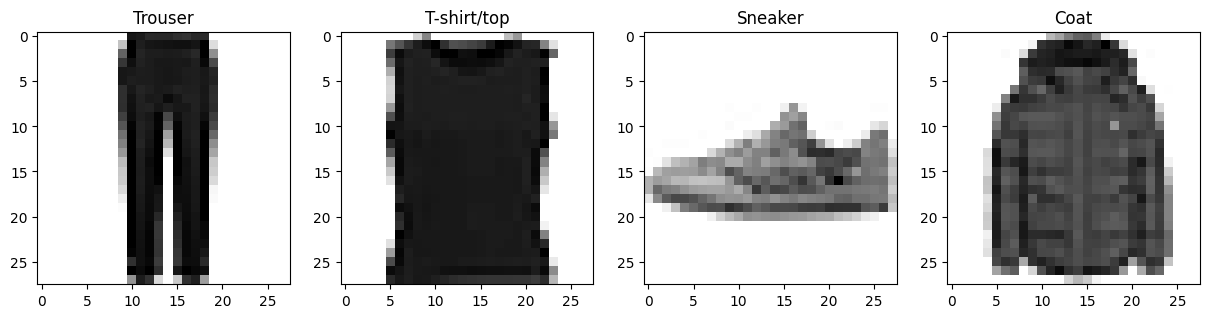

In [11]:
# Looking at some images
indexes = [random.randint(0, len(train_data)) for i in range(4)]
ml_toolbox.analysis.image.plot_images_by_indices(indexes, train_data, train_labels, class_names, black_and_white=True)

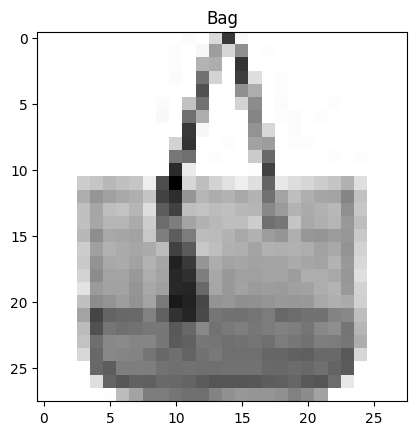

In [12]:
ml_toolbox.analysis.image.plot_image_by_index(35, train_data, train_labels, class_names, black_and_white=True)

### Preparing & Creating Datasets

In [13]:
# Constants
SCALING_FACTOR = 1. / 255

In [14]:
# Need to rename my data to be more consistant with other notebooks I've done
X_train, y_train = train_data, train_labels
X_test, y_test = test_data, test_labels

In [15]:
# Normalizing data
X_train_norm = X_train * SCALING_FACTOR
X_test_norm = X_test * SCALING_FACTOR

## Experiments

I am going to perform a handful of experiments using strictly Feed-Forward networks to practice ways of optimizing models.

* Experiment-0 (Baseline): Simple Classification Model
* Experiment-1: Finding Ideal Learning Rate
* Experiment-2: Ideal Learning Rate

### Experiment Constants

In [16]:
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE)
OUTPUT_SIZE = 10

### Experiment-0: Initial Classification Model

* 2 Hidden Layers - 4 Neurons, ReLu
* Loss function = CategoricalCrossentropy (if one-hot encoded) or SparseCategoricalCrossentropy (if integers)
* Output activation = SoftMax

In [17]:
# Consants
model_0_name = 'model_0_simple_nn'

EPOCHS_0 = 20
LEARNING_RATE_0 = 0.005

In [18]:
# Setting seed to compare models nicely
tf.random.set_seed(RANDOM_SEED)

# Create Model
# NOTE: Our data needs to be flatttened into a single vector
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=INPUT_SHAPE),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(OUTPUT_SIZE, activation=tf.keras.activations.softmax),
], name=model_0_name)

# Compile Model
model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE_0),
                metrics=['accuracy'])

# Fit Model
model_0_history = model_0.fit(X_train_norm,
                              y_train,
                              epochs=EPOCHS_0,
                              validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 1s 522us/step - loss: 1.1220 - accuracy: 0.5412 - val_loss: 0.8269 - val_accuracy: 0.6866
Epoch 2/20
1875/1875 [==============================] - 1s 470us/step - loss: 0.7953 - accuracy: 0.7015 - val_loss: 0.7936 - val_accuracy: 0.7033
Epoch 3/20
1875/1875 [==============================] - 1s 470us/step - loss: 0.7612 - accuracy: 0.7154 - val_loss: 0.7615 - val_accuracy: 0.7057
Epoch 4/20
1875/1875 [==============================] - 1s 470us/step - loss: 0.7490 - accuracy: 0.7195 - val_loss: 0.7500 - val_accuracy: 0.7259
Epoch 5/20
1875/1875 [==============================] - 1s 474us/step - loss: 0.7404 - accuracy: 0.7212 - val_loss: 0.8358 - val_accuracy: 0.6864
Epoch 6/20
1875/1875 [==============================] - 1s 474us/step - loss: 0.7329 - accuracy: 0.7269 - val_loss: 0.7501 - val_accuracy: 0.7303
Epoch 7/20
1875/1875 [==============================] - 1s 469us/step - loss: 0.7281 - accuracy: 0.7286 - val_loss: 0.7398 -

In [19]:
model_0.summary()

Model: "model_0_simple_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


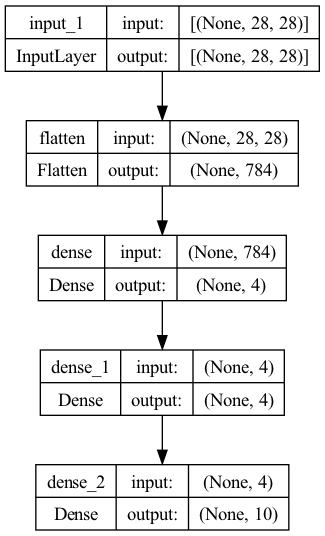

In [20]:
ml_toolbox.analysis.model.plot_model(model_0)

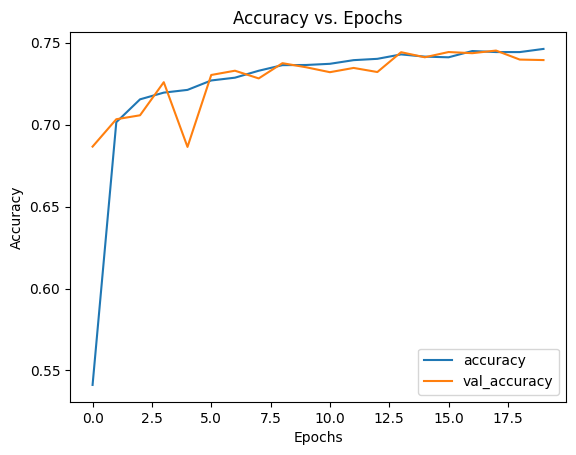

In [21]:
ml_toolbox.analysis.history.plot_history(model_0_history, metric='accuracy')

In [22]:
model_0_pred_probs = model_0.predict(X_test_norm)
model_0_preds = tf.argmax(model_0_pred_probs, axis=1)

model_0_results = ml_toolbox.analysis.classification.generate_prediction_metrics(y_test, model_0_preds, name=model_0_name)
model_0_results

313/313 [==============================] - 0s 424us/step


ClassificationPredictionMetrics(accuracy=0.7394, precision=0.7389082847394292, recall=0.7394, f1=0.7306618808809184, name='model_0_simple_nn')

### Experiment-1: Finding Ideal Learning Rate

This experiment uses the same architecture as Experiment-0 to focus on finding an optimal learning rate.

* 2 Hidden Layers - 4 Neurons, ReLu
* Loss function = CategoricalCrossentropy (if one-hot encoded) or SparseCategoricalCrossentropy (if integers)
* Output activation = SoftMax

In [23]:
# Constants
model_1_name = 'model_1_lr_discovery'

EPOCHS_1 = 40
DECAY_STEP = 20
DECAY_FACTOR = 10

In [24]:
exponential_decay_function = ml_toolbox.modeling.learning_rate.generate_exponential_decay_function(
    decay_step=DECAY_STEP, decay_factor=DECAY_FACTOR)

In [25]:
# Rerunning model_1, but going to make a learning rate scheduler to help find optimal learning rate

# Setting seed to compare models nicely
tf.random.set_seed(RANDOM_SEED)

# Create Model
model_1 = tf.keras.models.clone_model(model_0)
model_1._name = model_1_name

# Compile Model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=['accuracy'])

# Fit Model w/ Learning Rate Scheduler
model_1_history = model_1.fit(
    X_train_norm,
    y_train,
    epochs=EPOCHS_1,
    validation_data=(X_test_norm, y_test),
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(exponential_decay_function),
    ],
)

Epoch 1/40
1875/1875 [==============================] - 1s 510us/step - loss: 1.0597 - accuracy: 0.5979 - val_loss: 0.7648 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 475us/step - loss: 0.6849 - accuracy: 0.7573 - val_loss: 0.6829 - val_accuracy: 0.7648 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 471us/step - loss: 0.6244 - accuracy: 0.7802 - val_loss: 0.6448 - val_accuracy: 0.7713 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 474us/step - loss: 0.5965 - accuracy: 0.7926 - val_loss: 0.6375 - val_accuracy: 0.7790 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 475us/step - loss: 0.5808 - accuracy: 0.7976 - val_loss: 0.6169 - val_accuracy: 0.7905 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 474us/step - loss: 0.5686 - accuracy: 0.8033 - val_loss: 0.6210 - val_accuracy: 0.7912 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

In [26]:
model_1_history_df = pd.DataFrame(model_1_history.history)
model_1_history_df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.059674,0.597900,0.764824,0.7348,0.001000
1,0.684920,0.757283,0.682855,0.7648,0.001122
2,0.624416,0.780217,0.644769,0.7713,0.001259
3,0.596538,0.792567,0.637519,0.7790,0.001413
4,0.580843,0.797617,0.616885,0.7905,0.001585


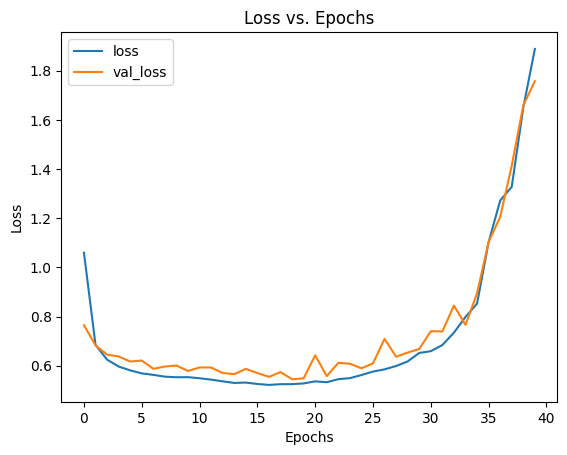

In [27]:
ml_toolbox.analysis.history.plot_history(model_1_history, 'loss')

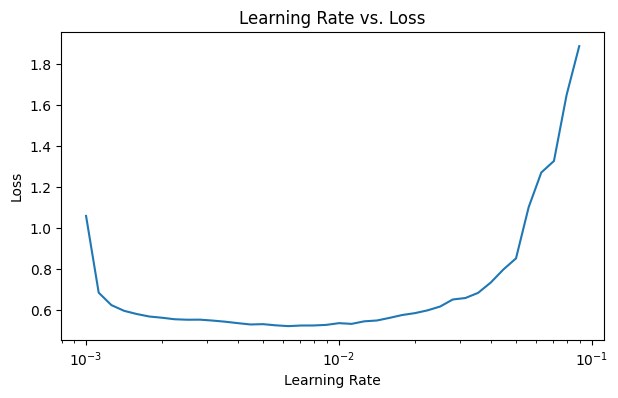

In [28]:
# Loss vs epoch
# Plot learning rate versus the loss
lrs = tf.convert_to_tensor([exponential_decay_function(x) for x in tf.range(EPOCHS_1)])
ml_toolbox.analysis.history.plot_learning_rate_versus_loss(lrs, model_1_history.history['loss'], figsize=(7, 4))

#### Ideal Learning Rate

After looking at the plot above, is looks like our ideal learning rate is between 0.001 and 0.003, so going to use 0.002.

### Experiment-2: Model w/ Ideal Learning Rate

This experiment uses the same architecture as Experiment-0 with the optimal learning rate.

* 2 Hidden Layers - 4 Neurons, ReLu
* Loss function = CategoricalCrossentropy (if one-hot encoded) or SparseCategoricalCrossentropy (if integers)
* Output activation = SoftMax

In [29]:
# Constants
model_2_name = 'model_2_ideal_lr'

EPOCHS_2 = 20
IDEAL_LEARNING_RATE = 0.002

In [30]:
# Setting seed to compare models nicely
tf.random.set_seed(RANDOM_SEED)

# Create Model
# NOTE: Our data needs to be flatttened into a single vector
model_2 = tf.keras.models.clone_model(model_0)
model_2._name = model_2_name

# Compile Model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=IDEAL_LEARNING_RATE),
                metrics=['accuracy'])

# Fit Model
model_2_history = model_2.fit(
    X_train_norm,
    y_train,
    epochs=EPOCHS_2,
    validation_data=(X_test_norm, y_test))

Epoch 1/20
1875/1875 [==============================] - 1s 534us/step - loss: 1.2916 - accuracy: 0.4982 - val_loss: 1.0323 - val_accuracy: 0.6067
Epoch 2/20
1875/1875 [==============================] - 1s 483us/step - loss: 0.9565 - accuracy: 0.6252 - val_loss: 0.9328 - val_accuracy: 0.6497
Epoch 3/20
1875/1875 [==============================] - 1s 473us/step - loss: 0.8661 - accuracy: 0.6690 - val_loss: 0.8734 - val_accuracy: 0.6662
Epoch 4/20
1875/1875 [==============================] - 1s 485us/step - loss: 0.8045 - accuracy: 0.6878 - val_loss: 0.8166 - val_accuracy: 0.6854
Epoch 5/20
1875/1875 [==============================] - 1s 486us/step - loss: 0.7786 - accuracy: 0.6954 - val_loss: 0.7972 - val_accuracy: 0.6926
Epoch 6/20
1875/1875 [==============================] - 1s 501us/step - loss: 0.7630 - accuracy: 0.7002 - val_loss: 0.8209 - val_accuracy: 0.6831
Epoch 7/20
1875/1875 [==============================] - 1s 481us/step - loss: 0.7511 - accuracy: 0.7022 - val_loss: 0.7824 -

In [31]:
# Predicting values from model_3
model_2_pred_probs = model_2.predict(X_test_norm)
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)

model_2_results = ml_toolbox.analysis.classification.generate_prediction_metrics(y_test, model_2_preds, name=model_2_name)
model_2_results

313/313 [==============================] - 0s 310us/step


ClassificationPredictionMetrics(accuracy=0.7438, precision=0.7382031418987905, recall=0.7438, f1=0.737105290476864, name='model_2_ideal_lr')

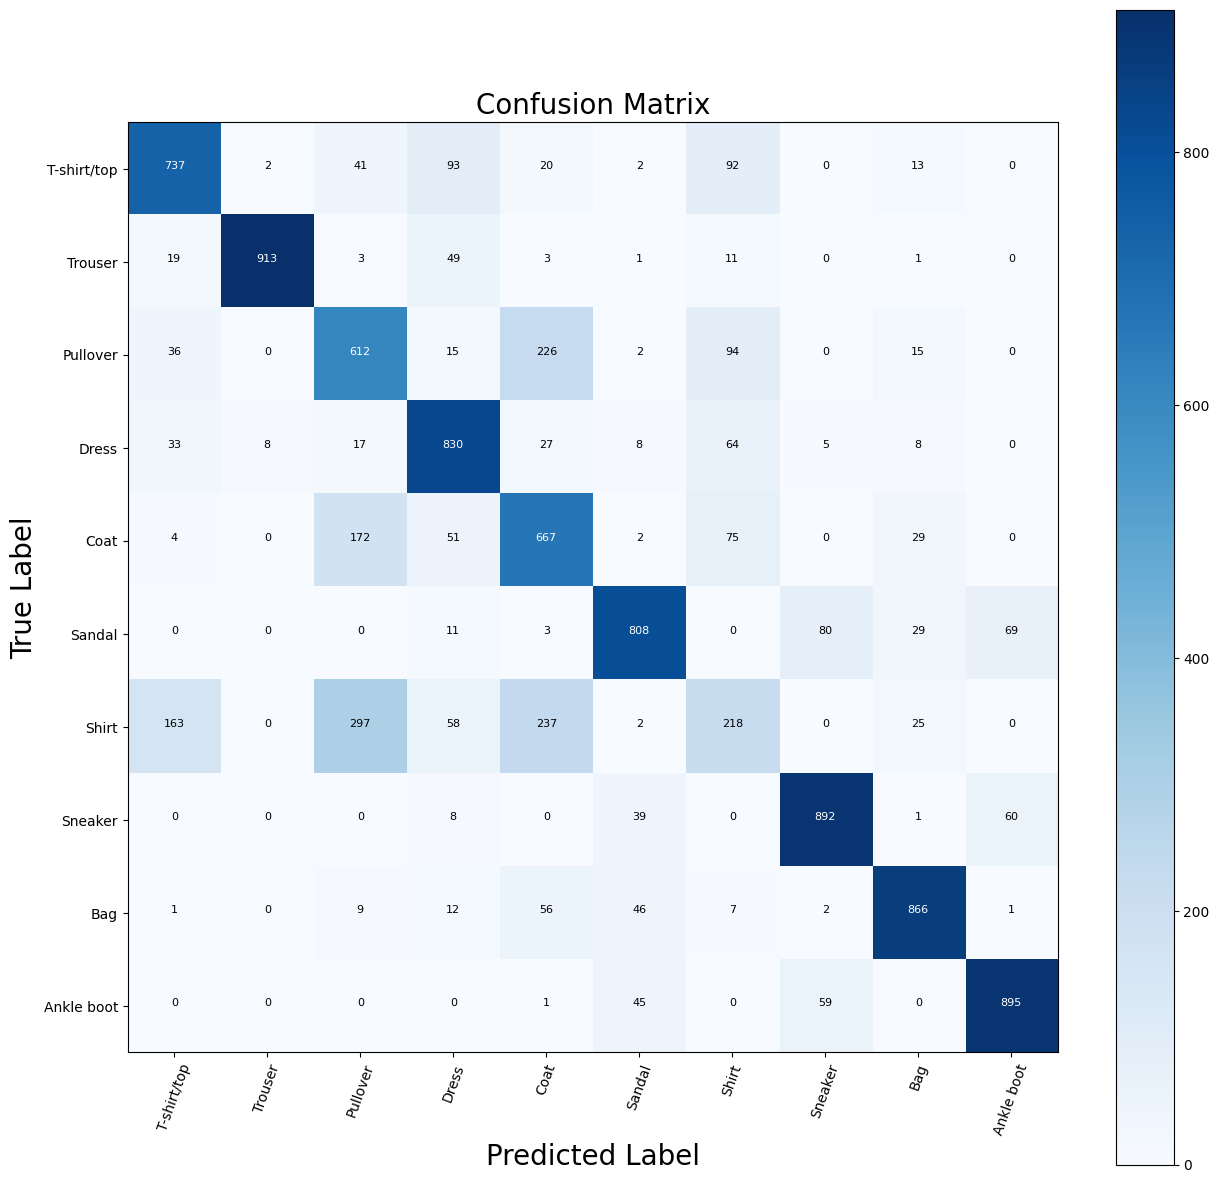

In [32]:
ml_toolbox.analysis.classification.plot_confusion_matrix(y_test, model_2_preds, cell_text_size=8, classes=class_names)

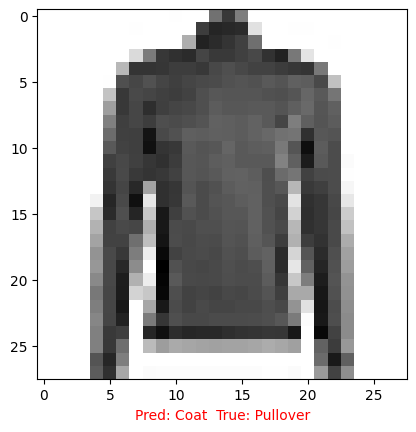

In [33]:
ml_toolbox.analysis.image.plot_random_image_label_and_prediction(
    images=X_test_norm,
    true_labels=y_test,
    pred_probabilities=model_2_pred_probs,
    class_names=class_names,
    black_and_white = True)

#### What Patterns is the Model Learning?

In [34]:
# Get the patterns in a network by looking at the weight of the first hidden layer
weights, biases = model_2.layers[1].get_weights()

weights, weights.shape, biases, biases.shape

(array([[ 1.8513485 , -0.05009561,  0.07807824,  0.43403885],
        [ 2.9137528 ,  0.07444257,  0.05095631, -0.18176459],
        [ 2.127686  ,  0.08643846, -0.11075977, -1.8074052 ],
        ...,
        [ 0.6283297 , -0.03911198, -0.05822476,  0.12609485],
        [ 0.02410487, -0.00566661,  0.02471698,  0.43907717],
        [ 0.6005988 , -0.06482319,  0.01005508, -0.0794708 ]],
       dtype=float32),
 (784, 4),
 array([ 4.878115  , -0.02160448, -0.03788633,  4.819953  ], dtype=float32),
 (4,))

In [35]:
# NOTE: the param represents the weights and biases that are trainable for each layer:
# flatten layer: 0 (just reshapes the data from 28x28 to 784)
# Dense (Hidden Layer 1): 3140 (784 * 4 = 3136 weights, 4 biases (one for each neuron in layer))
# Dense (Hidden Layer 2): 20 (4 * 4 = 16 weights, 4 biases (one for each neuron in layer))
# Dense (Output Layer): 50 (4 * 10 = 40 weights, 10 biases (one for each neuron in layer))
model_2.summary()

Model: "model_2_ideal_lr"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Analysis
### Evaluating Multi-class Classificaiton Model

To evaluate the multi-class classification model:
* Evaluate its performance using other classification metrics (such as a confusion matrix).
* Assess some of its predictions (through visualisations).
* Improve its results (by training it for longer or changing the architecture).
* Save and export it for usi in an application

In [36]:
all_results = [
    model_0_results,
    model_2_results,
]
all_results_df = ml_toolbox.analysis.classification.generate_prediction_metrics_dataframe(all_results)
all_results_df

,accuracy,precision,recall,f1
model_0_simple_nn,0.7394,0.738908,0.7394,0.730662
model_2_ideal_lr,0.7438,0.738203,0.7438,0.737105


<Axes: ylabel='F1 Score'>

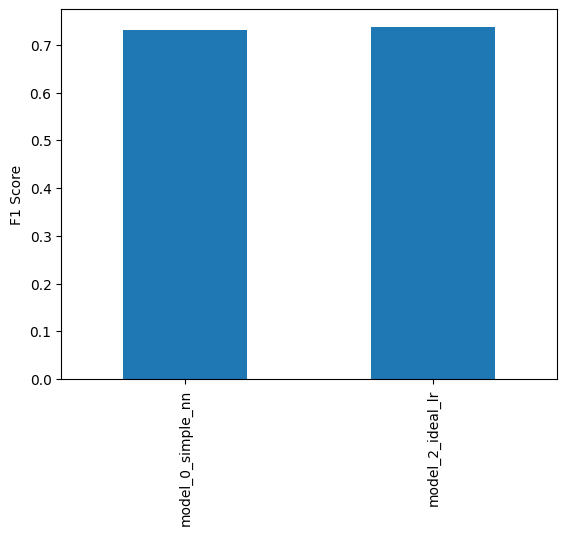

In [37]:
all_results_df['f1'].plot(kind='bar', ylabel='F1 Score')

#### Findings

After comparing the models, the model with the ideal Learning Rate outperformed the baseline model.